In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns



creditcardinfo = pd.read_csv("creditcard.csv")
print(creditcardinfo.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [17]:
creditcardinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
creditcardinfo['Class'].value_counts()#we are checking to see the number of fraudulent transactions and legit ones

Class
0    284315
1       492
Name: count, dtype: int64

In [19]:
#the dataset is highly unbalanced there is not enough fruadulaent data for the machine to recogognise fraudlent data
# we need to analyse the data seperatly
#in the dataset in the class column 0 = nonfraud, 1 = fraud
nonfraud = creditcardinfo[creditcardinfo.Class == 0]
fraud = creditcardinfo[creditcardinfo.Class == 1]
#to see the statistics of the average amounts spent on these transactions for class =0, i will output below.
nonfraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
#for class = 1(fraud)
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [21]:
#can see the average spent on fraudelent data is higher than nonfruad on most statistaical measures and can see them compared
creditcardinfo.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
#Build a sample dataset that has similar distrubition of normal and fraudulant transaction this helps to balance the dataset
#because we only have 492 fraudulaent we cant add more values to that column so we take 492 random transactions from the non fruadulent
nonfraudsample = nonfraud.sample(n = 492)

In [23]:
#we now are combining the 2 data sets fraud and random non fraud transactions
newset = pd.concat([nonfraudsample, fraud], axis =0)
newset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
59237,48757.0,-0.273835,0.931685,1.315973,-0.155192,0.314762,-0.444500,0.780611,-0.089824,-0.390198,...,-0.289749,-0.663723,-0.087106,-0.066133,-0.193150,0.048300,0.071875,-0.139307,8.99,0
45590,42413.0,1.349979,-0.474091,0.133642,-0.473193,-1.107407,-1.444046,-0.175854,-0.319211,-0.946225,...,-0.419193,-0.817822,0.081365,0.727905,0.235354,0.990417,-0.085499,0.006609,30.50,0
18074,29167.0,-1.789234,0.371487,1.629221,1.653439,1.545989,-1.006675,0.896809,-0.049173,-1.544112,...,0.075000,0.137178,0.230691,0.379752,0.747064,0.003329,-0.114751,0.090531,7.08,0
95197,65202.0,0.897068,-0.222436,0.287032,1.308291,-0.036016,0.639535,-0.020474,0.273504,0.084781,...,0.029647,0.086768,-0.120390,-0.273817,0.508753,-0.309082,0.032157,0.017753,101.70,0
6530,7894.0,1.216293,-0.068955,0.689429,0.174821,-0.799702,-0.975110,-0.291948,-0.222398,1.763500,...,-0.269498,-0.626593,0.083376,0.367699,0.062375,0.864158,-0.108095,0.008064,38.44,0


In [24]:
newset['Class'].value_counts()
#you can see the dataset is balanced with an equal amount of fraudulent transactions to non fraud

Class
0    492
1    492
Name: count, dtype: int64

In [25]:
#finding features and targets in the data 
X = newset.drop(columns = 'Class', axis =1)
Y = newset['Class']
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
59237    48757.0 -0.273835  0.931685  1.315973 -0.155192  0.314762 -0.444500   
45590    42413.0  1.349979 -0.474091  0.133642 -0.473193 -1.107407 -1.444046   
18074    29167.0 -1.789234  0.371487  1.629221  1.653439  1.545989 -1.006675   
95197    65202.0  0.897068 -0.222436  0.287032  1.308291 -0.036016  0.639535   
6530      7894.0  1.216293 -0.068955  0.689429  0.174821 -0.799702 -0.975110   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [26]:
print(Y)

59237     0
45590     0
18074     0
95197     0
6530      0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [27]:
#we can split the data into train and test datasets now
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify =Y, random_state =2)
#print(X.shape, X_train.shape, X_test.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Create a pipeline that first scales the data then fits the model
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [28]:
#model = LogisticRegression()
#model.fit(X_train, Y_train)

In [29]:
#model evaluation  training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("accuracy for training data ", training_data_accuracy)

accuracy for training data  0.9491740787801779


In [30]:
#test data accuracy 
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("accuracy for test data ", test_data_accuracy)

accuracy for test data  0.949238578680203


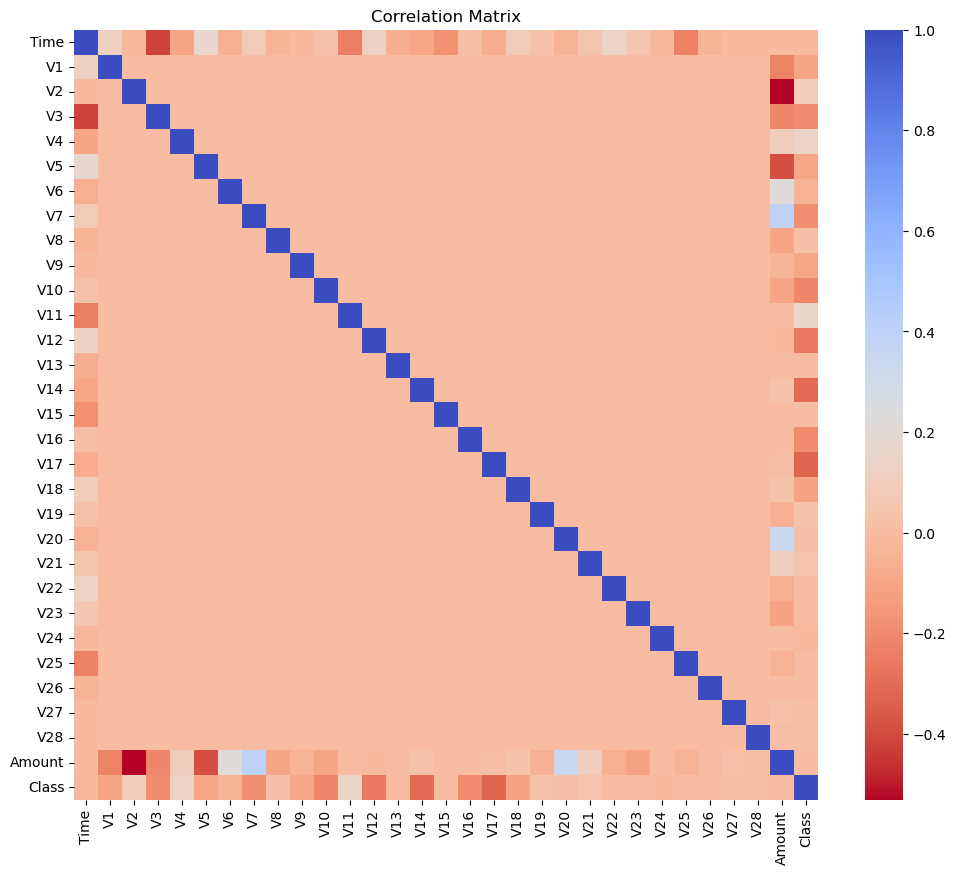

In [31]:
corr = creditcardinfo.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("Correlation Matrix")
plt.show()

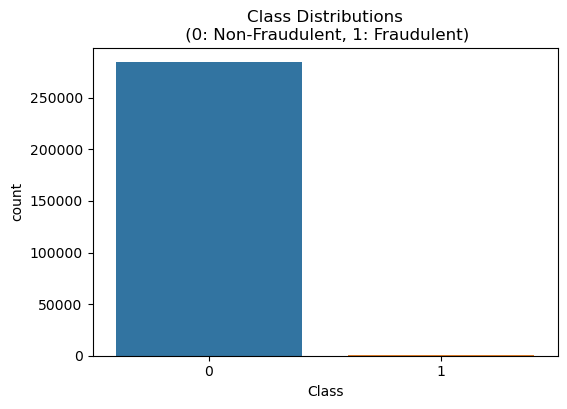

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=creditcardinfo)
plt.title('Class Distributions\n (0: Non-Fraudulent, 1: Fraudulent)')
plt.show()


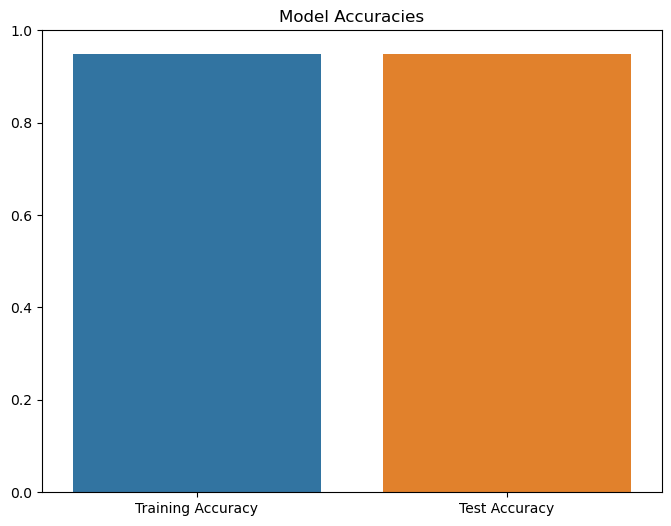

In [33]:
e 
# Calculate test accuracy
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

accuracies = {'Training Accuracy': training_data_accuracy, 'Test Accuracy': test_data_accuracy}
plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracies')
plt.ylim(0, 1)
plt.show()
